                                               1.Etude numérique

In [22]:
import numpy as np
def dernier_tau(t):
    tau=0
    while tau<t:
        tauf=tau
        tau+=np.random.exponential(scale=1,size=1)[0]
        #print(tau,tauf)
    return tauf

In [23]:
print(dernier_tau(4.6))

3.1480106909235803


$$

Soit \, C{\in}B(\Re)\\
P(X_t{\in}C)=P((Bt-{B\tau}_{Nt}){\in}C)= E[\mathbb{1}_{(Bt-{B\tau}_{Nt}){\in}C}]=E[E[\mathbb{1}_{(Bt-{B\tau}_{Nt}){\in}C}|F]] \,\,\,  (formule \,de \,l'espérance\, totale) \\
La \, variable \,  {\tau}_{Nt} \, est \, mesurable \, par \, rapport \, à \, F, donc \,avec \, {\tau}_{Nt} \, déterministe \, , \, Bt-{B\tau}_{Nt} \, suit \, une \, loi \, normale \, de \, moyenne \, 0 \, et \, de \, variance \, t-{\tau}_{Nt} \\
P(X_t{\in}C)=E[\int_{x{\in}\Re} \frac{1}{\sqrt{2{\pi}(t-{\tau}_{Nt})}} \exp({\frac{-x^2}{2(t-{\tau}_{Nt})}})\mathbb{1}_{x{\in}C}   \, \mathrm{d}x] \, \, \\
P(\sqrt{t-{\tau}_{Nt}}G{\in}C)=E[E[\mathbb{1}_{\sqrt{t-{\tau}_{Nt}}G{\in}C}|F]]\\ 
avec \, {\tau}_{Nt} \, déterministe \, , \, \sqrt{t-{\tau}_{Nt}}G \, suit \, une \, loi \, normale \, de \, moyenne \, 0 \, et \, de \, variance \, t-{\tau}_{Nt} \\ 
d'où \, P(\sqrt{t-{\tau}_{Nt}}G{\in}C)=E[\int_{x{\in}\Re} \frac{1}{\sqrt{2{\pi}(t-{\tau}_{Nt})}} \exp({\frac{-x^2}{2(t-{\tau}_{Nt})}}) \mathbb{1}_{x{\in}C}\, \mathrm{d}x] \,\\ 
On \, voit \, bien \, que \, les \, 2 \, variables \, aléatoire \, X_t \, et \, \sqrt{t-{\tau}_{Nt}}G \, ont \, même\, loi.
$$

In [24]:
def functX (t):
    return np.sqrt(t-dernier_tau(t))*np.random.randn(1)[0]

In [25]:
print(functX(4))

-2.6894159006221163


Text(0.5, 1.0, 'X(100)')

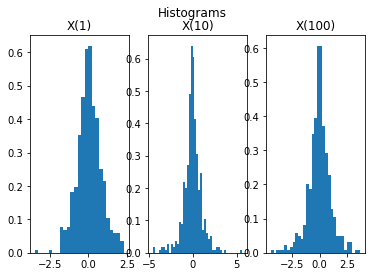

In [26]:
import matplotlib.pyplot as plt
def histo(t):
    X_list=[]
    for i in range(500) :
        X= functX(t)
        X_list.append(X)
    return X_list
        
fig, (axs0,axs1, axs2) = plt.subplots(1,3)
fig.suptitle('Histograms')
axs0.hist(histo(1), bins='auto', density= True)
axs0.set_title('X(1)')
axs1.hist(histo(10), bins='auto', density= True)
axs1.set_title('X(10)')
axs2.hist(histo(100), bins='auto', density= True)
axs2.set_title('X(100)')

                                            2. Etude théorique

Partie 1

$$
\tau_n= (\tau_1-\tau_0)+(\tau_2-\tau_1)+...+(\tau_n-\tau_{n-1})\\ 
\tau_n \,est \, la \, somme \, de \, n \, variables \, aléatoires \, exponentielles \, indépendantes \, de \, paramètre \, \lambda=1\\
Soient \, X \,et\, Y\, 2\, variables\, aléatoires\, indépendantes\, suivant\, des \,lois\, exponentielles \,de\, même \,paramètre \,\lambda \\
Cherchons \,la\, densité\, de\, X+Y \\
Si \, z<0 \, , (f*g)(z)=0 \\
Si \, z>0 \, , (f*g)(z)= \int_{0}^{\infty} f(z-y)g(y)\, \mathrm{d}y \, = \int_{0}^{\infty} \lambda \exp(-\lambda(z-y))\lambda\exp(-\lambda{y})\, \mathrm{d}y \,= \lambda^2z\exp(-\lambda{z})\\
Par \,induction\,,\, on\, montre \,que \,la \,densité\, de\, la\,somme \,de\, n\, lois\, exponentielles\, indépendantes \,de\,
même\, paramètre \, \lambda \, est \,donnée\, par\, : \\
f(z)=\frac {\lambda{\exp}(-\lambda{z})(\lambda{z})^{n-1}}{(n-1)!} \, avec \, z>0\\
Ce \, n'est \, autre \, que \, la \, loi \, gamma \, , \, mais \, un \, cas \, particulier \, de \, la \, loi \, gamma \, appelé \, loi \, d'Erlang.
La \, densité \, de \, la \, variable \, aléatoire \, \tau_n \, est \, alors \,donnée \, par\,:\,(pour \, \lambda=1)\\
f(z)=\frac {{\exp}(-{z})({z})^{n-1}}{(n-1)!} \, \, z>0\\
$$

partie 2.1(1ère méthode)

$$
Cherchons \, tout \, d'abord \,la\, loi\, de\, la\, variable\, aléatoire\, Nt \, pour \, t \, fixé \, \\
\forall n \in \mathbb{N} \, , \, \forall t>0 , \, l'événement \, \{Nt \geq n\} \, est \, équivalent \, à \, l'événement \, \{\tau_n \leq t\} \\
\, Comme \, démontré \, dans \,  la \, partie \, précédente\, , \, \tau_n \, suit \, une \, loi \, d'Erlang \,de \, densité\, f(x)=\frac {{\exp}(-{x})({x})^{n-1}}{(n-1)!} \, \, x>0\\
Soit\,  n \in \mathbb{N} \, \, P(Nt \geq n)= P(\tau_n \leq t)= \frac {1}{(n-1)!} \int_{0}^{t} {x}^{n-1}exp(-x)\, \mathrm{d}x \,= \frac {1}{(n-1)!} I_n \\ 
Une \, intégration \, par \, parties \, donne:\\
I_n= \int_{0}^{t} {x}^{n-1}exp(-x)\, \mathrm{d}x \,= {[ exp(-x)\frac{{x}^n}{n}]_0^t} + \int_{0}^{t} \frac{{x}^{n}}{n}exp(-x)\, \mathrm{d}x \,= exp(-t)\frac{t^n}{n}+\frac{1}{n} I_{n+1}\\
P(Nt \geq n)=exp(-t)\frac{t^n}{n!}+\frac{1}{n!} I_{n+1}\\
Notons \, que  \, \frac{1}{n!} I_{n+1}=P(Nt \geq {n+1})\\ 
Finalement,\, P(Nt=n)=P(Nt \geq n)-P(Nt \geq {n+1})=\frac{exp(-t)t^n}{n!}\\ \,
C'est \, une \, loi \, de \, poisson \, de \, paramètre \, t \, (généralement \, elle \, est \, de \, paramètre \, \lambda{t} \, mais \, dans \, notre \, cas \, \lambda =1)\\
E[g(t-\tau_{Nt})]=E[E[g(t-\tau_{Nt})|Nt]]=P(Nt=0)E[g(t-0)]+\sum \limits_{n=1}^{\infty} P(Nt=n)E[g(t-\tau_{Nt}|Nt=n)]\\
= exp(-t)g(t)+ \sum \limits_{n=1}^{\infty}\frac{exp(-t)t^n}{n!}E[g(t-\tau_{Nt})|Nt=n]\\
Calculons \, tout \, d'abord \, le\, terme \, E[g(t-\tau_{Nt})|Nt=n]\\
E[g(t-\tau_{Nt})|Nt=n]= \int_{0}^{\infty} g(t-s)f_{\tau_{Nt}|Nt=n}(s)\, \mathrm{d}s \,=\int_{0}^{t} g(t-s) \frac{n{s}^{n-1}}{t^n}\, \mathrm{d}s \,\\
En\, effet\,,\, F_{\tau_n|Nt=n}(s)=P(\tau_n\leq{s}|Nt=n)\\
si \,s\geq{t}, \,\,F_{{\tau_n}|Nt=n}(s)=1\,\, (événement\, certain)\\
si\, s<t:\,
F_{\tau_n|Nt=n}(s)=P(Ns\geq{n}|Nt=n)=P(Ns>n|Nt=n)+P(Ns=n|Nt=n)=\frac{P(Ns=n,Nt-Ns=0)}{P(Nt=n)}\\
Les\, accroissements\, de\, Nt\, sont\, indépendants\, et\, stationnaires:\,
F_{\tau_n|Nt=n}(s)=\frac{exp(-s)s^n}{n!}exp(-(t-s))\frac{n!}{exp(-t)t^n}=(\frac{s}{t})^n\\
f_{\tau_n|Nt=n}(s)= \left\{
    \begin{array}{ll}
        \frac{ns^{n-1}}{t^n} & \mbox{si } s<t \\
        0 & \mbox{sinon.}
    \end{array}
\right.\\
E[g(t-\tau_{Nt})]=exp(-t)g(t)+ \sum \limits_{n=1}^{\infty}\frac{exp(-t)t^n}{n!}\int_{0}^{t} g(t-s) \frac{n{s}^{n-1}}{t^n}\, \mathrm{d}s \,\\
Soit\, u=t-s \, \, du= -ds\\
E[g(t-\tau_{Nt})]=exp(-t)g(t)+ \int_{0}^{t}\sum \limits_{n=1}^{\infty}\frac{{(t-u)}^{n-1}}{(n-1)!}exp(-t) g(u) \, \mathrm{d}u \,\,\,\,\,(convergence \,dominée)\\
\sum \limits_{n=1}^{\infty}\frac{{(t-u)}^{n-1}}{(n-1)!}= exp(t-u)\\
E[g(t-\tau_{Nt})]=exp(-t)g(t)+ \int_{0}^{t}exp(-u) g(u) \, \mathrm{d}u \,\,\,\, cqfd \\
$$

partie 2.1 (autre méthode)

$$
Essayons \, cette \,fois-ci\, de\, ne\, pas\, recourir \,explicitement \,à \,la\, loi\, de \,Nt\, ni \,à \,celle\, de\, \tau_{Nt} \, conditionnée\, par \,rapport\, à \,Nt. \\
E[g(t-\tau_{Nt})]=E[\sum \limits_{n=0}^{\infty} g(t-\tau_{Nt})\mathbb{1}_{\tau_n\leq{t}<{\tau_{n+1}}}]=E[g(t-\tau_{Nt})\mathbb{1}_{\tau_0\leq{t}<{\tau_{1}}}]+\sum \limits_{n=1}^{\infty}E[g(t-\tau_{Nt})\mathbb{1}_{\tau_n\leq{t}<{\tau_{n+1}}}]\\
E[g(t-\tau_{Nt})\mathbb{1}_{\tau_0\leq{t}<{\tau_{1}}}]=E[g(t)\mathbb{1}_{{t}\leq{\tau_{1}}}]=g(t)E[\mathbb{1} _{{t}\leq{\tau_{1}}}]=g(t)P(t\leq\tau_1)=g(t)\int_{t}^{\infty}exp(-u) \, \mathrm{d}u=g(t)exp(-t)\\
E[g(t-\tau_{Nt})\mathbb{1}_{\tau_n\leq{t}<{\tau_{n+1}}}]=E[E[g(t-\tau_{Nt})\mathbb{1}_{\tau_n\leq{t}<{\tau_{n+1}}}]|F]\\
E[g(t-\tau_{Nt})\mathbb{1}_{\tau_n\leq{t}<{\tau_{n+1}}}]|F]=g(t-\tau_n)E[\mathbb{1}_{0\leq{t-\tau_n}<{\tau_{n+1}-\tau_n}}|F]\,\, \tau_n \, étant \, F-mesurable.\\
=g(t-\tau_n)E[\mathbb{1}_{0\leq{t-\tau_n}}*\mathbb{1}_{{t-\tau_n}<{\tau_{n+1}-\tau_n}}|F]=g(t-\tau_n)\mathbb{1}_{0\leq{t-\tau_n}}E[\mathbb{1}_{{t-\tau_n}<{\tau_{n+1}-\tau_n}}|F]=g(t-\tau_n)\mathbb{1}_{0\leq{t-\tau_n}}P({\tau_{n+1}-\tau_n} \geq {t-\tau_n}|F)=g(t-\tau_n)\mathbb{1}_{0\leq{t-\tau_n}}exp(-(t-\tau_n))\\
En\, effet\,,\, \tau_n \,est\, F-mesurable\, alors \,que\, la\, variable\, \tau_{n+1}-\tau_{n}\, est \,indépendante\, de \,F\, et\, suit\, une \,loi \,exponentielle\, de \,paramètre\, 1.\\
\sum \limits_{n=1}^{\infty}E[g(t-\tau_{Nt})\mathbb{1}_{\tau_n\leq{t}<{\tau_{n+1}}}]=\sum \limits_{n=1}^{\infty}E[g(t-\tau_n)\mathbb{1}_{0\leq{t-\tau_n}}exp(-(t-\tau_n))]=\sum \limits_{n=1}^{\infty}\int_{0}^{t}g(t-s)exp(-(t-s)) \frac{exp(-s)s^{n-1}}{(n-1)!} \, \mathrm{d}s\\
On\,faisant\, le \,même\,changement \,de\, variable\, que\, la\, partie\, précédente,\, on \,trouve \,le\, même\, résultat.\\
La\, connaissance\, de\, la \, loi \, de \,Nt\, et \,celle\, de\, \tau_{Nt}|Nt \, est \, donc \, non \, nécessaire \, pour \, justifier\, l'égalité\, donnée.\\
Notons \, que \, d'une \, certaine \, manière \, le \, terme \, exp(-t)g(t) \, représente \, la\, partie\, "sans\, resetting"\, alors \, que \, \int_{0}^{t}exp(-u) g(u) \, \mathrm{d}u \,\, représente \, toute \, la \, partie \, avec \, resetting.
$$

partie 2.2

$$
Soit \, la \, variable \, aléatoire \,\,\,\, t\mathbb{1}_{t<\tau_1}+ \tau_1\mathbb{1}_{t>\tau_1}.\\
Pour\, toute\,fonction\, mesurable\, et\, bornée\, g: [0,+\infty[ \rightarrow \mathbf{R}\\
E[g(t\mathbb{1}_{t<\tau_1}+ \tau_1\mathbb{1}_{t>\tau_1})]=E[g(t)\mathbb{1}_{t<\tau_1}+g(\tau_1)\mathbb{1}_{t>\tau_1}]=g(t)E[\mathbb{1}_{t<\tau_1}]+E[g(\tau_1)\mathbb{1}_{t>\tau_1}]=g(t)exp(-t)+\int_{0}^{t}g(s)exp(-s) \, \mathrm{d}s\,=E[g(t-\tau_{Nt})]\\
On\, peut\, donc\, décrire\, simplement\, la \,loi \, de\, t-\tau_{Nt}\, par\, la \,loi \,de\, la\, variable \,aléatoire \,t\mathbb{1}_{t<\tau_1}+ \tau_1\mathbb{1}_{t>\tau_1} \, et \, c'est\,intuitif\, de \, pouvoir \, décrire \,la \,loi\, de\\  t-\tau_{Nt} \, seulement \,à \,partir\, de \,t\, et \, \tau_1
$$

partie 3

$$
P(Xt\leq{a})=P(\sqrt{t-\tau_{Nt}}G\leq{a})=E[\mathbb{1}_{\sqrt{t-\tau_{Nt}}G\leq{a}}]=E[E[\mathbb{1}_{\sqrt{t-\tau_{Nt}}G\leq{a}}|F]]=E[g(t-\tau_{Nt})]\\
g(t-\tau_{Nt})=E[\mathbb{1}_{\sqrt{t-\tau_{Nt}}G\leq{a}}|F]=E[\mathbb{1}_{\sqrt{t-\tau_{Nt}}G\leq{a}}] \, \, où \, \tau_{Nt} \, est \, déterministe\\
g(t-\tau_{Nt})=P(\sqrt{t-\tau_{Nt}}G\leq{a})=\frac{1}{\sqrt{2\pi(t-\tau_{Nt})}}\int_{-\infty}^{a} exp(\frac{-x^2}{2(t-\tau_{Nt})})\, \mathrm{d}x \, \\ 
Or \,\,E[g(t-\tau_{Nt})]=exp(-t)g(t)+\int_{s=0}^{t} g(s)exp(-s)\, \mathrm{d}s \\
=exp(-t)\frac{1}{\sqrt{2\pi{t}}}\int_{-\infty}^{a} exp(\frac{-x^2}{2{t}})\, \mathrm{d}x \, + \, \int_{s=0}^{t}\frac{1}{\sqrt{2\pi{s}}}[\int_{-\infty}^{a} exp(\frac{-x^2}{2{s}}) \, \mathrm{d}x]exp(-s)\, \mathrm{d}s \,\\
Donc\, \, F_{Xt}(a)=P({Xt}\leq{a})=exp(-t)\frac{1}{\sqrt{2\pi{t}}}\int_{-\infty}^{a} exp(\frac{-x^2}{2{t}})\, \mathrm{d}x \, + \, \int_{s=0}^{t}\frac{1}{\sqrt{2\pi{s}}}[\int_{-\infty}^{a} exp(\frac{-x^2}{2{s}}) \, \mathrm{d}x]exp(-s)\, \mathrm{d}s \,\\
f_{Xt}(a)=F'_{Xt}(a)=\frac{1}{\sqrt{2\pi{t}}}exp(\frac{-a^2}{2{t}}-{t})+\int_{s=0}^{t}\frac{1}{\sqrt{2\pi{s}}}exp(-s-\frac{a^2}{2s})\, \mathrm{d}s \,
$$

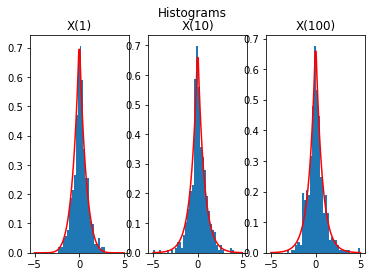

In [28]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
def histo(t):
    X_list=[]
    for i in range(500) :
        X= functX(t)
        X_list.append(X)
    return X_list
def density(t):
    a=np.linspace(-5,5,100)
    y_list=[]
    f = lambda s,a : (np.exp(-s-(a**2)/(2*s)))/np.sqrt(2*np.pi*s)
    for k in range (len(a)):
         res, err= quad(f, 0, t,args=(a[k],))
         y=np.exp(-t-((a[k])**2)/(2*t))/np.sqrt(2*np.pi*t) + res
         y_list.append(y)
    return a,y_list

fig, (axs0,axs1, axs2) = plt.subplots(1,3)
fig.suptitle('Histograms')
axs0.hist(histo(1), bins='auto', density= True)
axs0.set_title('X(1)')
axs1.hist(histo(10), bins='auto', density= True)
axs1.set_title('X(10)')
axs2.hist(histo(100), bins='auto', density= True)
axs2.set_title('X(100)')
axs0.plot(density(1)[0],density(1)[1],'r')
axs1.plot(density(10)[0],density(10)[1],'r')
axs2.plot(density(100)[0],density(100)[1],'r')
plt.show()

partie 4

$$
Quand \, t\rightarrow \infty \,\,,f_{X_t}(x) \rightarrow \int_{s=0}^{\infty}\frac{1}{\sqrt{2\pi{s}}}exp(-s-\frac{a^2}{2s})\, \mathrm{d}s \,\\
E[exp(iuX_t)]=\int_{-\infty}^{+\infty} exp(iux) f_{X_t}(x) \, \mathrm{d}x \,\,\,\, \underrightarrow{t\rightarrow{\infty}}\int_{-\infty}^{+\infty} exp(iux) [\int_{s=0}^{\infty}\frac{1}{\sqrt{2\pi{s}}}exp(-s-\frac{x^2}{2s})\, \mathrm{d}s ]\, \, \mathrm{d}x= \int_{-\infty}^{+\infty} exp(\frac{-(x-ius)^2}{2s}) [\int_{s=0}^{\infty}\frac{1}{\sqrt{2\pi{s}}}exp(-s-\frac{{u^2}{s}}{2})\, \mathrm{d}s ]\, \, \mathrm{d}x=\int_{s=0}^{\infty} [\int_{-\infty}^{+\infty}\frac{1}{\sqrt{2\pi{s}}} exp(\frac{-(x-ius)^2}{2s}) \mathrm{d}x] exp(-s-\frac{{u^2}{s}}{2})\, \mathrm{d}s\,\,(Fubini) \, \,\\
Or \,\,\int_{-\infty}^{+\infty}\frac{1}{\sqrt{2\pi{s}}} exp(\frac{-(x-ius)^2}{2s}) \mathrm{d}x=1 \\
Alors \,\, E[exp(iuX_t)]=\int_{s=0}^{\infty}exp(-s-\frac{{u^2}{s}}{2})\, \mathrm{d}s= \frac{1}{1+\frac{u^2}{2}}\\
X_t \, converge \, alors\, en\, loi \, vers \, une \, loi \, de \, Laplace\, de \, paramètre\, \sqrt{2} \, qui \, est \, aussi \, la\, loi\, de B_\tau \, , \, où \, \tau \, est \, une \, variable \, aléatoire \, exponentielle\, de \, paramètre \, 1 \,, \, indépendante \, du\, mouvement \, brownien \, (B_t)_{t\geq0} 
$$

Le mouvement brownien est un processus gaussien, en particulier Bt est une variable gaussienne pour tout t>=0, alors qu'une variable aléatoire du mouvement brownien avec resetting change de loi , et converge en loi vers une loi de Laplace de moyenne 0 de parametre racine 2. 
Alors que la courbe du mouvement brownien peut aller "très loin" sur la droite des réels,de plus en plus loin, dans un temps infini (en repassant toujours à distance finie, autrement dit elle revient une infinité de fois dans U, pour tout U ouvert non vide de la droite des réels, et ce n'est autre que la récurrence du mouvement brownien en dimension 1),Ce qu'on  observe c'est que la trajectoire d'un mouvement brownien avec resetting est moins dispersée autour de la moyenne; voire une variance égale à 1 en un temps infini (étant donné que la variance d'une loi de Laplace de paramètre k est 2/(k^2)).
En parlant d'une manière vulgarisée, le "resetting" est une sorte d'obligation du mouvement brownien à se réinitialiser avant qu'il aille très loin de la moyenne (m=0).